## Regularización en la Regresión Lineal

Objetivos

Después de completar este laboratorio, serás capaz de:

Implementar, evaluar y comparar el rendimiento de tres técnicas de regularización para regresión lineal.

Analizar el efecto de la regularización lineal simple al modelar datos ruidosos, tanto con como sin valores atípicos.

Utilizar regularización Lasso para reducir el número de características antes de un posterior modelado de regresión lineal múltiple.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score

Definir una función para mostrar métricas de evaluación

Vamos a evaluar varios modelos, por lo que es una buena idea crear una función de evaluación que incluya las métricas más comunes y la varianza explicada, entre otros indicadores.

In [2]:
def regression_results(y_true, y_pred, regr_type):

    # Regression metrics
    ev = explained_variance_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print('Evaluation metrics for ' + regr_type + ' Linear Regression')
    print('explained_variance: ',  round(ev,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mae,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))
    print()

## Generar un conjunto de datos simple con una característica

Crearemos un conjunto de datos simple con una relación lineal entre la variable objetivo y una sola característica.
Agregaremos ruido a la variable objetivo para simular datos reales.

También crearemos una versión de este conjunto de datos con valores atípicos (outliers) añadidos.
Luego compararás el rendimiento de tres modelos de regresión lineal en ambos conjuntos de datos: con y sin los outliers significativos.

In [4]:
# Generate synthetic data
noise=1
np.random.seed(42)
X = 2 * np.random.rand(1000, 1)
y = 4 + 3 * X + noise*np.random.randn(1000, 1)  # Linear relationship with some noise
y_ideal =  4 + 3 * X
# Specify the portion of the dataset to add outliers (e.g., the last 20%)
y_outlier = pd.Series(y.reshape(-1).copy())

# Identify indices where the feature variable X is greater than a certain threshold
threshold = 1.5  # Example threshold to add outliers for larger feature values
outlier_indices = np.where(X.flatten() > threshold)[0]

# Add outliers at random locations within the specified portion
num_outliers = 5  # Number of outliers to add
selected_indices = np.random.choice(outlier_indices, num_outliers, replace=False)

# Modify the target values at these indices to create outliers (add significant noise)
y_outlier[selected_indices] += np.random.uniform(50, 100, num_outliers)

## Graficar los datos con outliers y la línea de ajuste ideal

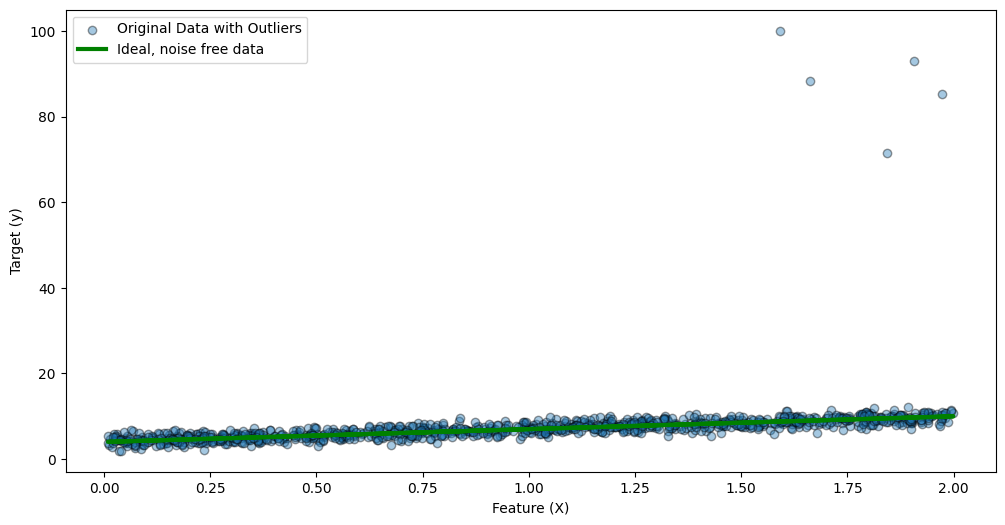

In [5]:
plt.figure(figsize=(12, 6))

# Scatter plot of the original data with outliers
plt.scatter(X, y_outlier, alpha=0.4,ec='k', label='Original Data with Outliers')
plt.plot(X, y_ideal,  linewidth=3, color='g',label='Ideal, noise free data')

plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('')
plt.legend()
plt.show()

## Ejercicio 1. Graficar los datos sin los outliers y la línea de ajuste ideal

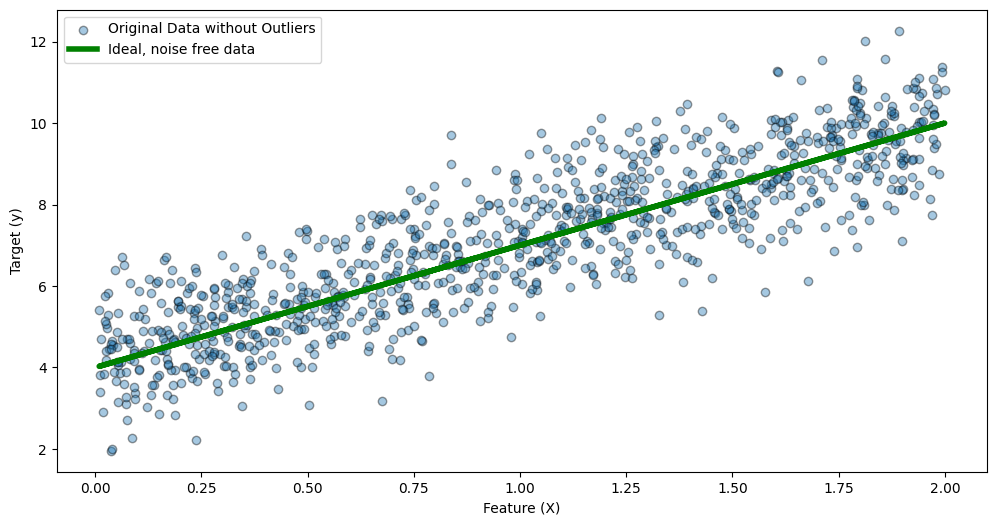

In [6]:
plt.figure(figsize=(12, 6))

# Scatter plot of the original data with outliers
plt.scatter(X, y, alpha=0.4,ec='k', label='Original Data without Outliers')
plt.plot(X, y_ideal,  linewidth=4, color='g',label='Ideal, noise free data')

plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('')
plt.legend()
plt.show()

## Ejercicio 1. Graficar los datos sin outliers y la línea de ajuste ideal

In [8]:
# Fit a simple linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X, y_outlier)
y_outlier_pred_lin = lin_reg.predict(X)

# Fit a ridge regression model (regularization to control large coefficients)
ridge_reg = Ridge(alpha=1)
ridge_reg.fit(X, y_outlier)
y_outlier_pred_ridge = ridge_reg.predict(X)

# Fit a lasso regression model (regularization to control large coefficients)
lasso_reg = Lasso(alpha=.2)
lasso_reg.fit(X, y_outlier)
y_outlier_pred_lasso = lasso_reg.predict(X)

## Imprimir los resultados de la regresión

In [9]:
regression_results(y, y_outlier_pred_lin, 'Ordinary')
regression_results(y, y_outlier_pred_ridge, 'Ridge')
regression_results(y, y_outlier_pred_lasso, 'Lasso')

Evaluation metrics for Ordinary Linear Regression
explained_variance:  0.6748
r2:  0.6357
MAE:  0.9468
MSE:  1.4164
RMSE:  1.1901

Evaluation metrics for Ridge Linear Regression
explained_variance:  0.6766
r2:  0.6375
MAE:  0.9443
MSE:  1.4094
RMSE:  1.1872

Evaluation metrics for Lasso Linear Regression
explained_variance:  0.7394
r2:  0.7003
MAE:  0.8597
MSE:  1.1651
RMSE:  1.0794



A juzgar por los valores bajos de R², estas predicciones son pobres.

### Graficar los datos y las predicciones para comparación

Veamos qué tan bien coinciden las predicciones con los valores ideales esperados.

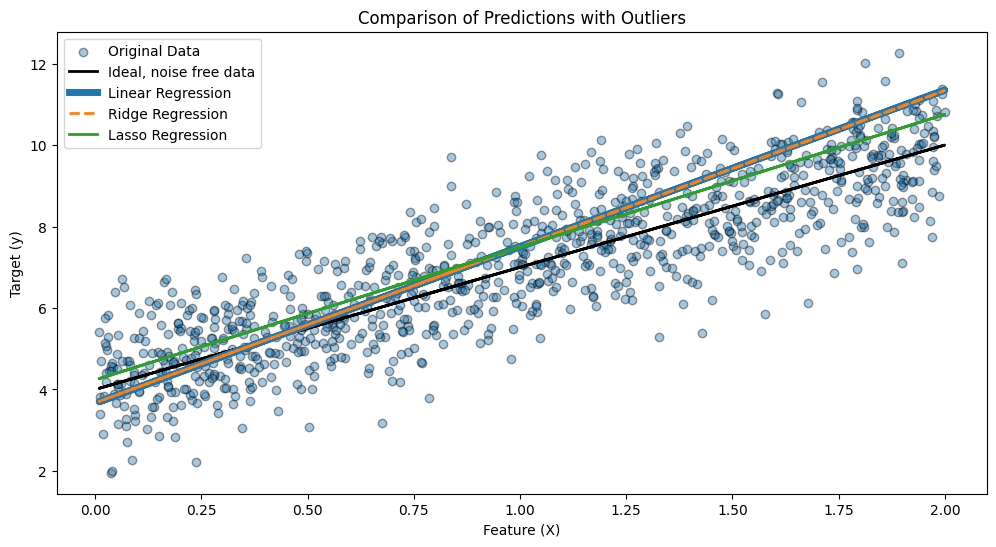

In [10]:
plt.figure(figsize=(12, 6))

# Scatter plot of the original data with outliers
plt.scatter(X, y, alpha=0.4,ec='k', label='Original Data')

# Plot the ideal regression line (noise free data)
plt.plot(X, y_ideal,  linewidth=2, color='k',label='Ideal, noise free data')

# Plot predictions from the simple linear regression model
plt.plot(X, y_outlier_pred_lin,  linewidth=5, label='Linear Regression')

# Plot predictions from the ridge regression model
plt.plot(X, y_outlier_pred_ridge, linestyle='--', linewidth=2, label='Ridge Regression')

# Plot predictions from the lasso regression model
plt.plot(X, y_outlier_pred_lasso,  linewidth=2, label='Lasso Regression')

plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('Comparison of Predictions with Outliers')
plt.legend()
plt.show()

Como puedes ver, la regresión lineal ordinaria y la Ridge tuvieron un rendimiento similar, mientras que Lasso superó a ambas.

Aunque la intersección (intercept) de la línea de ajuste de Lasso está algo desviada, su pendiente (slope) está mucho más cercana a la ideal que las otras líneas de ajuste.

Las tres líneas fueron arrastradas hacia arriba por los outliers (no mostrados aquí; compáralo con la gráfica anterior donde sí se ven los outliers), siendo Lasso la que amortigua mejor ese efecto.

## Ejercicio 2. Construir los modelos y las gráficas de predicción usando los mismos datos, excluyendo los outliers

Evaluation metrics for Ordinary Linear Regression
explained_variance:  0.7492
r2:  0.7492
MAE:  0.7873
MSE:  0.975
RMSE:  0.9874

Evaluation metrics for Ridge Linear Regression
explained_variance:  0.7492
r2:  0.7492
MAE:  0.7874
MSE:  0.975
RMSE:  0.9874

Evaluation metrics for Lasso Linear Regression
explained_variance:  0.7191
r2:  0.7191
MAE:  0.8408
MSE:  1.0923
RMSE:  1.0451



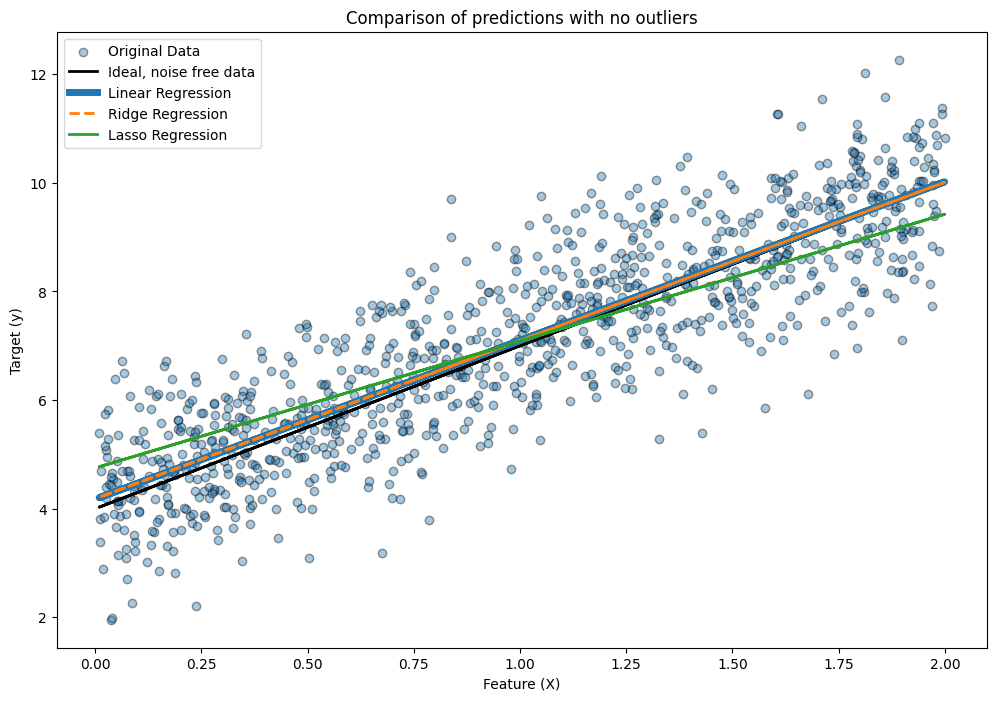

In [11]:
# Fit a simple linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred_lin = lin_reg.predict(X)

# Fit a ridge regression model (regularization to control large coefficients)
ridge_reg = Ridge(alpha=1)
ridge_reg.fit(X, y)
y_pred_ridge = ridge_reg.predict(X)

# Fit a lasso regression model (regularization to control large coefficients)
lasso_reg = Lasso(alpha=0.2)
lasso_reg.fit(X, y)
y_pred_lasso = lasso_reg.predict(X)

# Print the regression results
regression_results(y, y_pred_lin, 'Ordinary')
regression_results(y, y_pred_ridge, 'Ridge')
regression_results(y, y_pred_lasso, 'Lasso')


# Plot the data and the predictions
plt.figure(figsize=(12, 8))

# # Scatter plot of the original data
plt.scatter(X, y, alpha=0.4,ec='k', label='Original Data')

# Plot the ideal regression line (noise free data)
plt.plot(X, y_ideal,  linewidth=2, color='k',label='Ideal, noise free data')

# Plot predictions from the simple linear regression model
plt.plot(X, y_pred_lin,  linewidth=5, label='Linear Regression')

# Plot predictions from the ridge regression model
plt.plot(X, y_pred_ridge, linestyle='--',linewidth=2, label='Ridge Regression')

# Plot predictions from the lasso regression model
plt.plot(X, y_pred_lasso,  linewidth=2, label='Lasso Regression')

plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
# plt.ylim((0,20))
plt.title('Comparison of predictions with no outliers')
plt.legend()
plt.show()

## Regularización en regresión múltiple y selección de características con Lasso

Ahora que has explorado la regularización en regresión simple (unidimensional), vamos a profundizar en un escenario de regresión múltiple.

Nuevamente compararás el rendimiento de los tres métodos de regresión lineal y luego usarás los resultados de Lasso para seleccionar las características más importantes, que se utilizarán en una segunda ronda de modelado.

## Crear un conjunto de datos sintético de alta dimensionalidad con pocas características informativas usando make_regression

La salida de make_regression se genera aplicando un modelo de regresión lineal aleatorio basado en n_informative regresores no nulos y algo de ruido gaussiano ajustable.

Junto con las características y la variable objetivo, también se pueden obtener los coeficientes del modelo de regresión a partir de la salida.

Dividiremos los datos en conjuntos de entrenamiento y prueba, y también se dividirán las predicciones ideales, que corresponden a una línea basada en el modelo de regresión lineal.

In [12]:
from sklearn.datasets import make_regression

X, y, ideal_coef = make_regression(n_samples=100, n_features=100, n_informative=10, noise=10, random_state=42, coef=True)

# Get the ideal predictions based on the informative coefficients used in the regression model
ideal_predictions = X @ ideal_coef

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test, ideal_train, ideal_test = train_test_split(X, y, ideal_predictions, test_size=0.3, random_state=42)

### Inicializar y ajustar los modelos de regresión lineal y usarlos para predecir la variable objetivo

In [13]:
lasso = Lasso(alpha=0.1)
ridge = Ridge(alpha=1.0)
linear = LinearRegression()

# Fit the models
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)
linear.fit(X_train, y_train)

# Predict on the test set
y_pred_linear = linear.predict(X_test)
y_pred_ridge = ridge.predict(X_test)
y_pred_lasso = lasso.predict(X_test)

### Imprimir los resultados de la regresión

In [14]:
regression_results(y_test, y_pred_linear, 'Ordinary')
regression_results(y_test, y_pred_ridge, 'Ridge')
regression_results(y_test, y_pred_lasso, 'Lasso')

Evaluation metrics for Ordinary Linear Regression
explained_variance:  0.4354
r2:  0.4018
MAE:  77.7353
MSE:  9844.2714
RMSE:  99.2183

Evaluation metrics for Ridge Linear Regression
explained_variance:  0.4446
r2:  0.4079
MAE:  76.9622
MSE:  9744.4693
RMSE:  98.7141

Evaluation metrics for Lasso Linear Regression
explained_variance:  0.9815
r2:  0.9815
MAE:  13.8855
MSE:  304.644
RMSE:  17.4541



### Ejercicio 3. ¿Tienes alguna impresión inicial sobre estas métricas de rendimiento?

Los resultados de la regresión ordinaria y de Ridge son pobres.

Las varianzas explicadas están por debajo del 50% y el R² es muy bajo.

Sin embargo, el resultado de Lasso es excelente.

### Graficar las predicciones vs los valores reales

Veamos con más detalle el rendimiento de estos modelos.

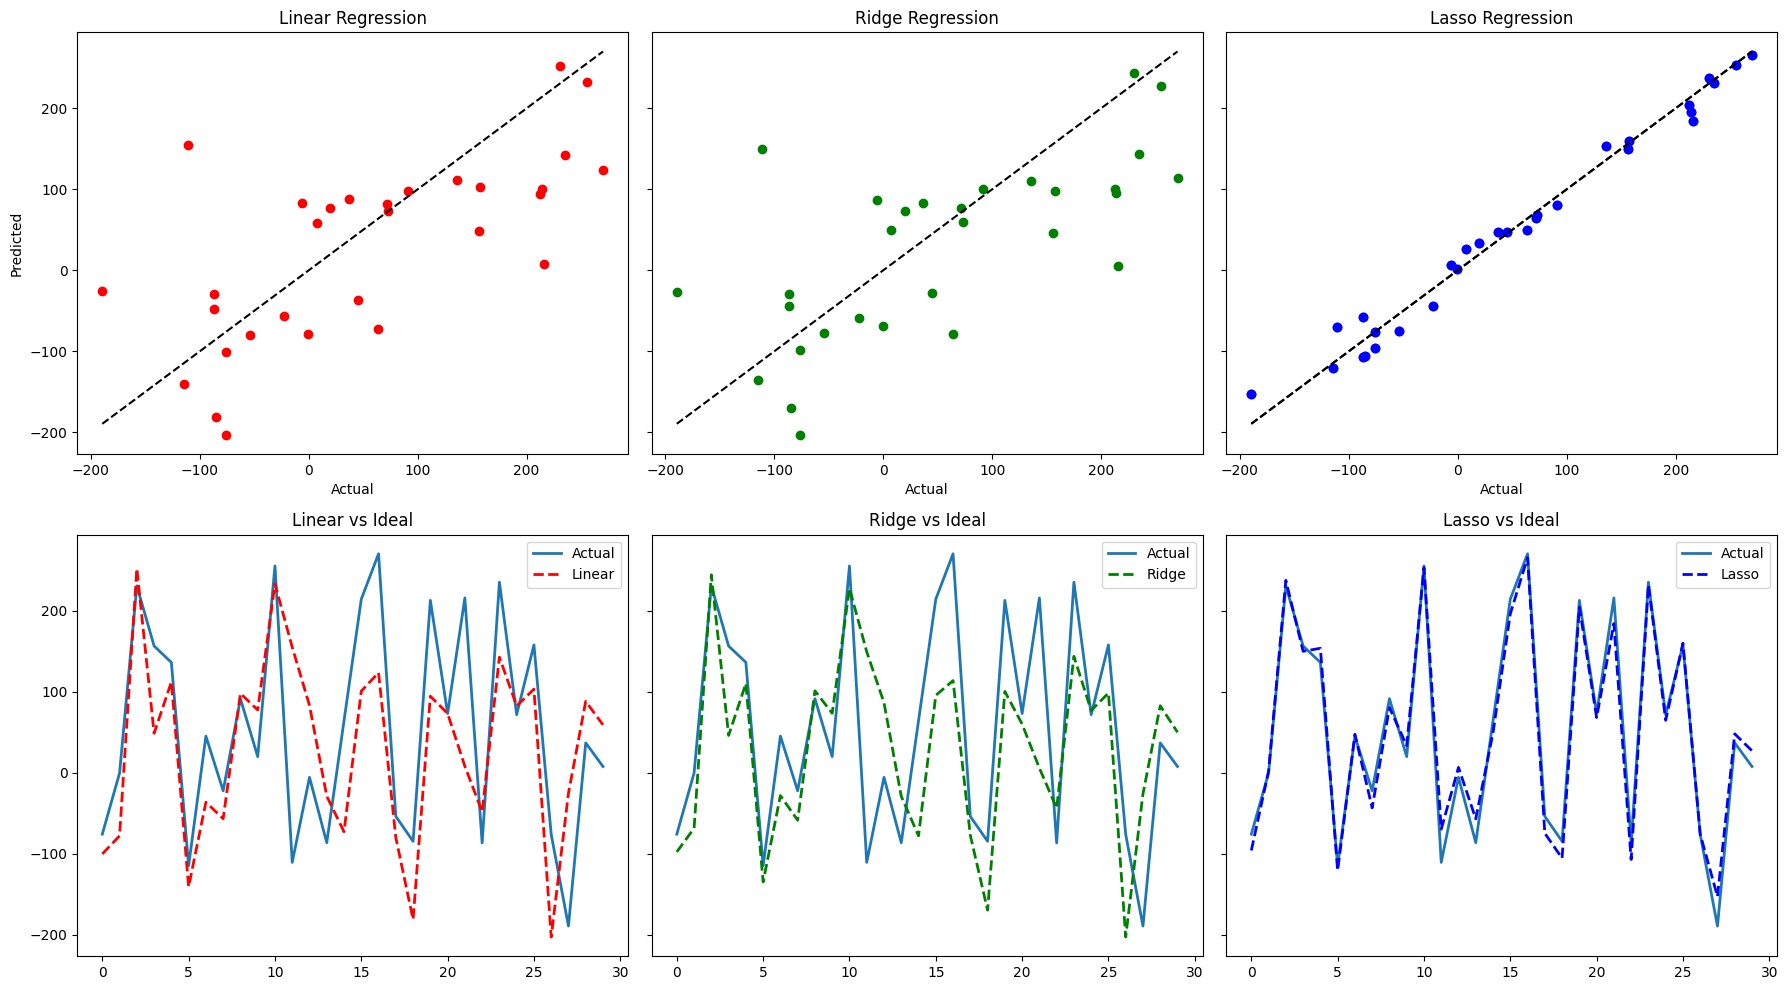

In [15]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharey=True)

axes[0,0].scatter(y_test, y_pred_linear, color="red", label="Linear")
axes[0,0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
axes[0,0].set_title("Linear Regression")
axes[0,0].set_xlabel("Actual",)
axes[0,0].set_ylabel("Predicted",)

axes[0,2].scatter(y_test, y_pred_lasso, color="blue", label="Lasso")
axes[0,2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
axes[0,2].set_title("Lasso Regression",)
axes[0,2].set_xlabel("Actual",)

axes[0,1].scatter(y_test, y_pred_ridge, color="green", label="Ridge")
axes[0,1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
axes[0,1].set_title("Ridge Regression",)
axes[0,1].set_xlabel("Actual",)

axes[0,2].scatter(y_test, y_pred_lasso, color="blue", label="Lasso")
axes[0,2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
axes[0,2].set_title("Lasso Regression",)
axes[0,2].set_xlabel("Actual",)


# Line plots for predictions compared to actual and ideal predictions
axes[1,0].plot(y_test, label="Actual", lw=2)
axes[1,0].plot(y_pred_linear, '--', lw=2, color='red', label="Linear")
axes[1,0].set_title("Linear vs Ideal",)
axes[1,0].legend()

axes[1,1].plot(y_test, label="Actual", lw=2)
# axes[1,1].plot(ideal_test, '--', label="Ideal", lw=2, color="purple")
axes[1,1].plot(y_pred_ridge, '--', lw=2, color='green', label="Ridge")
axes[1,1].set_title("Ridge vs Ideal",)
axes[1,1].legend()

axes[1,2].plot(y_test, label="Actual", lw=2)
axes[1,2].plot(y_pred_lasso, '--', lw=2, color='blue', label="Lasso")
axes[1,2].set_title("Lasso vs Ideal",)
axes[1,2].legend()

plt.tight_layout()
plt.show()

Puedes observar visualmente que las predicciones de regresión ordinaria y Ridge se desvían mucho más de los valores ideales de la variable objetivo que las de Lasso.

### Coeficientes del modelo

Echemos un vistazo a los coeficientes obtenidos para cada modelo ajustado.

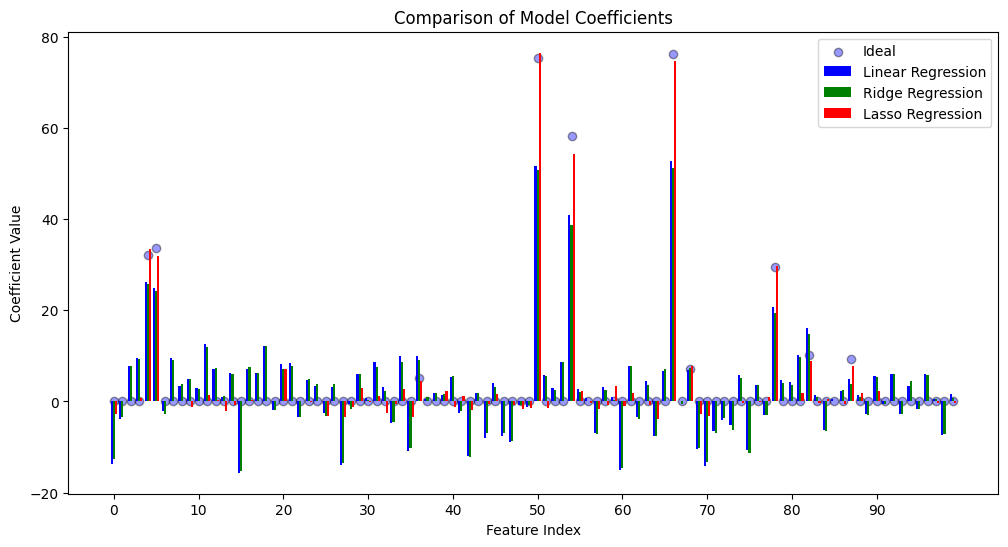

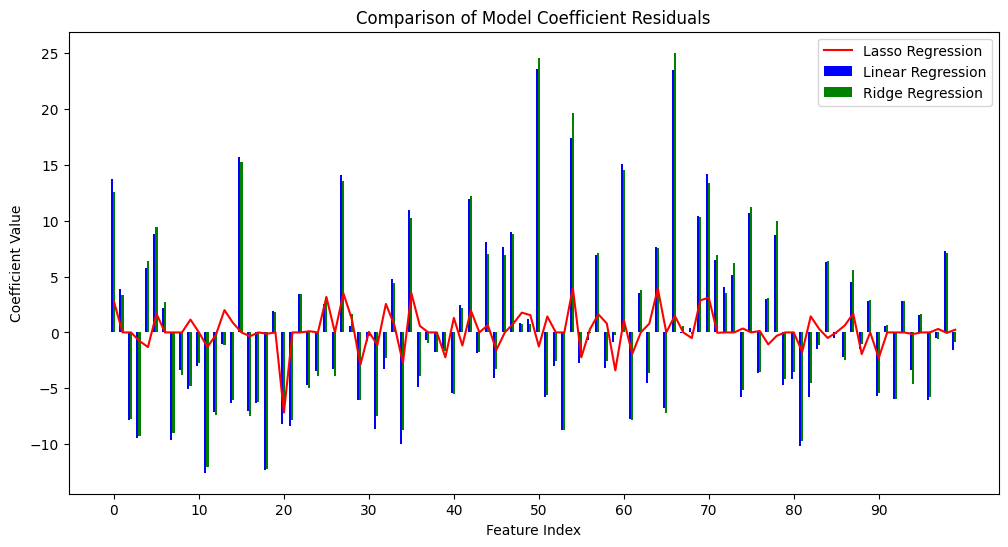

In [16]:
# Model coefficients
linear_coeff = linear.coef_
ridge_coeff = ridge.coef_
lasso_coeff = lasso.coef_

# Plot the coefficients
x_axis = np.arange(len(linear_coeff))
x_labels = np.arange(min(x_axis), max(x_axis), 10)
plt.figure(figsize=(12, 6))

plt.scatter(x_axis, ideal_coef, label='Ideal', color='blue', ec='k', alpha=0.4)
plt.bar(x_axis - 0.25, linear_coeff, width=0.25, label='Linear Regression', color='blue')
plt.bar(x_axis, ridge_coeff, width=0.25, label='Ridge Regression', color='green')
plt.bar(x_axis + 0.25, lasso_coeff, width=0.25, label='Lasso Regression', color='red')

plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('Comparison of Model Coefficients')
plt.xticks(x_labels)
plt.legend()
plt.show()

# Plot the coefficient residuals
x_axis = np.arange(len(linear_coeff))

plt.figure(figsize=(12, 6))

plt.bar(x_axis - 0.25, ideal_coef - linear_coeff, width=0.25, label='Linear Regression', color='blue')
plt.bar(x_axis, ideal_coef - ridge_coeff, width=0.25, label='Ridge Regression', color='green')
# plt.bar(x_axis + 0.25, ideal_coef - lasso_coeff, width=0.25, label='Lasso Regression', color='red')
plt.plot(x_axis, ideal_coef - lasso_coeff, label='Lasso Regression', color='red')

plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('Comparison of Model Coefficient Residuals')
plt.xticks(x_labels)
plt.legend()
plt.show()

Se puede observar en la primera gráfica que los coeficientes de Lasso están mucho más cerca de los coeficientes ideales que los de los otros dos modelos.

Una manera más clara de visualizar la diferencia es mediante los errores residuales, como se muestra en la segunda gráfica. Claramente, los residuos de los coeficientes de Lasso están mucho más cercanos a cero que los de los demás modelos.

### Usar Lasso para seleccionar las características más importantes y volver a comparar los tres modelos de regresión lineal en los datos resultantes

#### Parte 1. Elegir un valor umbral para seleccionar características basado en los coeficientes del modelo Lasso

Usa la gráfica de residuos de los coeficientes para seleccionar un valor umbral razonable, más allá del cual los coeficientes de Lasso se consideren significativos.
Para encontrar un buen umbral, inspecciona visualmente la gráfica de residuos y elige un valor que distinga los coeficientes con residuos mayores a lo normal.

Crea un dataframe para comparar los coeficientes de Lasso con los coeficientes ideales, usando solo las características seleccionadas mediante el umbral de coeficientes de Lasso.

Incluye una columna booleana que indique si la característica fue seleccionada como importante según el umbral de Lasso.

Muestra dos versiones filtradas del dataframe resultante:

Solo las características identificadas como importantes por Lasso.

Solo los índices de los coeficientes ideales distintos de cero.

¿Y cómo nos fue?

In [17]:
threshold = 5 # selected by inspection of residuals plot

# Create a dataframe containing the Lasso model and ideal coefficients
feature_importance_df = pd.DataFrame({
    'Lasso Coefficient': lasso_coeff,
    'Ideal Coefficient': ideal_coef
})

# Mark the selected features
feature_importance_df['Feature Selected'] = feature_importance_df['Lasso Coefficient'].abs() > threshold


print("Features Identified as Important by Lasso:")
display(feature_importance_df[feature_importance_df['Feature Selected']])

print("\nNonzero Ideal Coefficient Indices")
display(feature_importance_df[feature_importance_df['Ideal Coefficient']>0])

Features Identified as Important by Lasso:


,Lasso Coefficient,Ideal Coefficient,Feature Selected
4,33.435088,32.125517,True
5,32.014793,33.692687,True
20,7.163636,0.000000,True
50,76.576829,75.319970,True
54,54.306360,58.286936,True
66,74.841971,76.330808,True
68,7.685653,7.180755,True
78,29.735685,29.434817,True
82,8.864669,10.301919,True
87,7.745131,9.427598,True



Nonzero Ideal Coefficient Indices


,Lasso Coefficient,Ideal Coefficient,Feature Selected
4,33.435088,32.125517,True
5,32.014793,33.692687,True
36,4.588118,5.166218,False
50,76.576829,75.319970,True
54,54.306360,58.286936,True
66,74.841971,76.330808,True
68,7.685653,7.180755,True
78,29.735685,29.434817,True
82,8.864669,10.301919,True
87,7.745131,9.427598,True


El resultado es muy bueno. Logramos identificar correctamente 9 de las 10 características importantes.

#### Parte 2. Usar el umbral para seleccionar las características más importantes para el modelado

Además, divide tus datos en conjuntos de entrenamiento y prueba, incluyendo los valores ideales de la variable objetivo.

¿Cuántas características terminaste seleccionando?

In [18]:
important_features = feature_importance_df[feature_importance_df['Feature Selected']].index

In [19]:
# Filter features
X_filtered = X[:, important_features]
print("Shape of the filtered feature set:", X_filtered.shape)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test, ideal_train, ideal_test = train_test_split(X_filtered, y, ideal_predictions, test_size=0.3, random_state=42)

Shape of the filtered feature set: (100, 10)


#### Parte 3. Ajustar y aplicar los tres modelos a las características seleccionadas

In [20]:
# Initialize the models
lasso = Lasso(alpha=0.1)
ridge = Ridge(alpha=1.0)
linear = LinearRegression()

# Fit the models
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)
linear.fit(X_train, y_train)

# Predict on the test set
y_pred_linear = linear.predict(X_test)
y_pred_ridge = ridge.predict(X_test)
y_pred_lasso = lasso.predict(X_test)

### Ejercicio 4. Imprimir los resultados de rendimiento de la regresión

In [21]:
regression_results(y_test, y_pred_linear, 'Ordinary')
regression_results(y_test, y_pred_ridge, 'Ridge')
regression_results(y_test, y_pred_lasso, 'Lasso')

Evaluation metrics for Ordinary Linear Regression
explained_variance:  0.9917
r2:  0.9915
MAE:  9.653
MSE:  139.4874
RMSE:  11.8105

Evaluation metrics for Ridge Linear Regression
explained_variance:  0.9909
r2:  0.9905
MAE:  10.1418
MSE:  156.9035
RMSE:  12.5261

Evaluation metrics for Lasso Linear Regression
explained_variance:  0.9917
r2:  0.9914
MAE:  9.6928
MSE:  140.803
RMSE:  11.866



Vamos a comparar los resultados para ver el efecto de la selección de características usando Lasso

Aquí están los resultados anteriores:

Evaluation metrics for Ordinary Linear Regression
| Metric | Score |
|:---|:---|
|explained_variance: |0.4346 |
|r2   |0.4012 |
|MAE  | 77.7479 |
|MSE  | 9855.428 |
|RMSE   |99.2745 |

Evaluation metrics for Ridge Linear Regression
| Metric | score |
|:---|:---|
|explained_variance: | 0.4446|
|r2  |0.4079|
|MAE | 76.9622|
|MSE  |9744.4693|
|RMSE  |98.7141|

Evaluation metrics for Lasso Linear Regression
| Metric | score |
|:---|:---|
|explained_variance: | 0.9815|
|r2  |0.9815|
|MAE | 13.8855|
|MSE  |304.644|
|RMSE | 17.4541|

Los nuevos resultados muestran una mejora considerable para Regresión Ordinaria y Ridge, y una ligera mejora para Lasso, lo que respalda la idea de que Lasso puede ser muy útil cuando se utiliza como selector de características.

### Ejercicio 5. Regenerar las mismas gráficas que antes y comparar los resultados

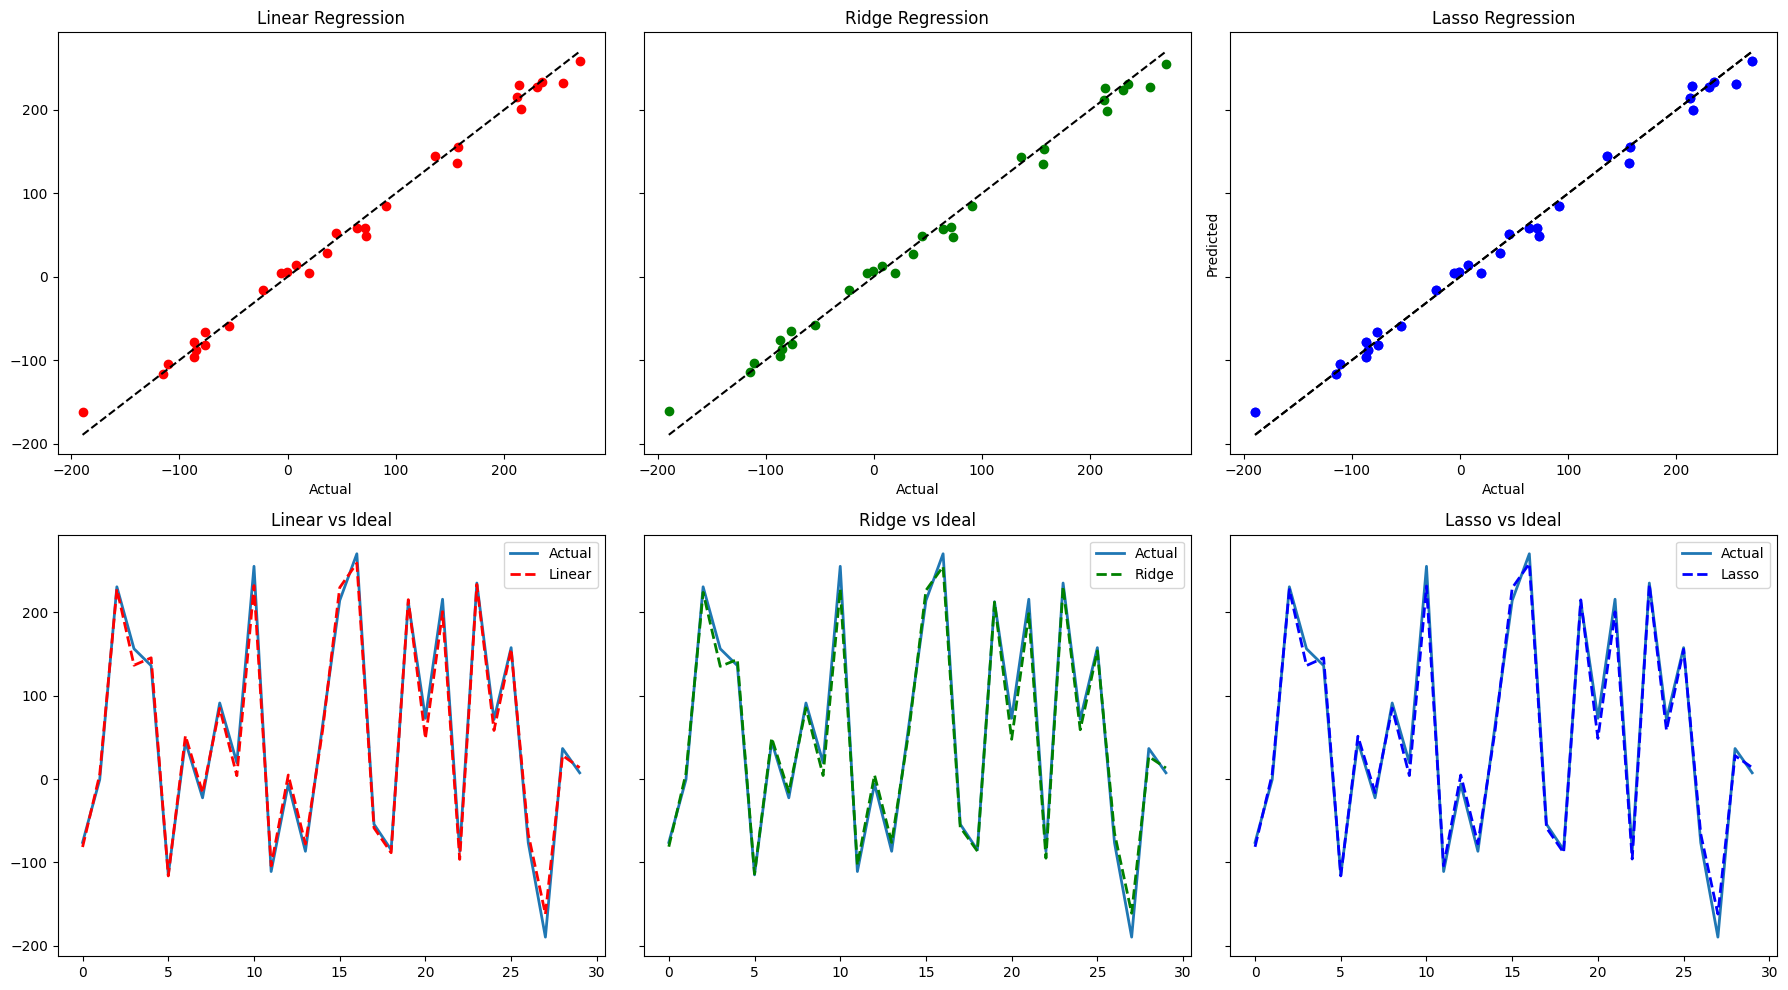

In [22]:
# Plot the predictions vs actuals
fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharey=True)

axes[0,0].scatter(y_test, y_pred_linear, color="red", label="Linear")
axes[0,0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
axes[0,0].set_title("Linear Regression",)
axes[0,0].set_xlabel("Actual",)

axes[0,2].scatter(y_test, y_pred_lasso, color="blue", label="Lasso")
axes[0,2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
axes[0,2].set_title("Lasso Regression",)
axes[0,2].set_xlabel("Actual",)
axes[0,2].set_ylabel("Predicted",)

axes[0,1].scatter(y_test, y_pred_ridge, color="green", label="Ridge")
axes[0,1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
axes[0,1].set_title("Ridge Regression",)
axes[0,1].set_xlabel("Actual",)

axes[0,2].scatter(y_test, y_pred_lasso, color="blue", label="Lasso")
axes[0,2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
axes[0,2].set_title("Lasso Regression",)
axes[0,2].set_xlabel("Actual",)
axes[0,2].set_ylabel("Predicted",)

# Line plots for predictions compared to actual and ideal predictions
axes[1,0].plot(y_test, label="Actual", lw=2)
axes[1,0].plot(y_pred_linear, '--', lw=2, color='red', label="Linear")
axes[1,0].set_title("Linear vs Ideal",)
axes[1,0].legend()

axes[1,1].plot(y_test, label="Actual", lw=2)
axes[1,1].plot(y_pred_ridge, '--', lw=2, color='green', label="Ridge")
axes[1,1].set_title("Ridge vs Ideal",)
axes[1,1].legend()

axes[1,2].plot(y_test, label="Actual", lw=2)
axes[1,2].plot(y_pred_lasso, '--', lw=2, color='blue', label="Lasso")
axes[1,2].set_title("Lasso vs Ideal",)
axes[1,2].legend()

plt.tight_layout()
plt.show()